In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import river_201702 as river_old
from salishsea_tools import river_202108 as river_new

In [2]:
bathy_old = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bathy_new = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [3]:
mesh_old = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
mesh_new = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [4]:
freshwater_old = xr.open_dataset('/results/forcing/rivers/R201702DFraCElse_y2022m12d16.nc')
freshwater_new = xr.open_dataset('/results/forcing/rivers/R202108Dailies_y2022m12d16.nc')

In [5]:
physics_old = xr.open_dataset('/results2/SalishSea/nowcast-green.201905/16dec22/SalishSea_1d_20221216_20221216_grid_T.nc')
physics_new = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/16dec22/SalishSea_1d_20221216_20221216_grid_T.nc')

In [7]:
ymin, ymax = 200, 230
xmin, xmax = 305, 335

In [11]:
Sy_old, Sx_old = river_old.prop_dict['skagit']['Skagit1']['i'], river_old.prop_dict['skagit']['Skagit1']['j']
Sy_new, Sx_new = river_new.prop_dict['skagit']['Skagit1']['i'], river_new.prop_dict['skagit']['Skagit1']['j']
print (Sy_old, Sx_old, Sy_new, Sx_new)

205 330 213 313


In [10]:
print (river_new.prop_dict['skagit'])

{'Skagit1': {'prop': 0.22875, 'i': 213, 'j': 313, 'di': 1, 'dj': 1, 'depth': 2}, 'Skagit2': {'prop': 0.22875, 'i': 229, 'j': 310, 'di': 1, 'dj': 1, 'depth': 2}, 'Samish': {'prop': 0.034, 'i': 271, 'j': 342, 'di': 1, 'dj': 1, 'depth': 3}, 'JoeLeary': {'prop': 0.0085, 'i': 257, 'j': 331, 'di': 1, 'dj': 1, 'depth': 1}, 'Stillaguamish1': {'prop': 0.119, 'i': 183, 'j': 308, 'di': 1, 'dj': 1, 'depth': 1}, 'Stillaguamish2': {'prop': 0.017, 'i': 188, 'j': 306, 'di': 1, 'dj': 1, 'depth': 1}, 'Stillaguamish3': {'prop': 0.034, 'i': 205, 'j': 307, 'di': 1, 'dj': 1, 'depth': 1}, 'SnohomishAllenQuilceda': {'prop': 0.3234, 'i': 138, 'j': 311, 'di': 1, 'dj': 1, 'depth': 2}, 'Tulalip': {'prop': 0.0033000000000000004, 'i': 155, 'j': 310, 'di': 1, 'dj': 1, 'depth': 1}, 'Mission': {'prop': 0.0033000000000000004, 'i': 154, 'j': 311, 'di': 1, 'dj': 1, 'depth': 1}}


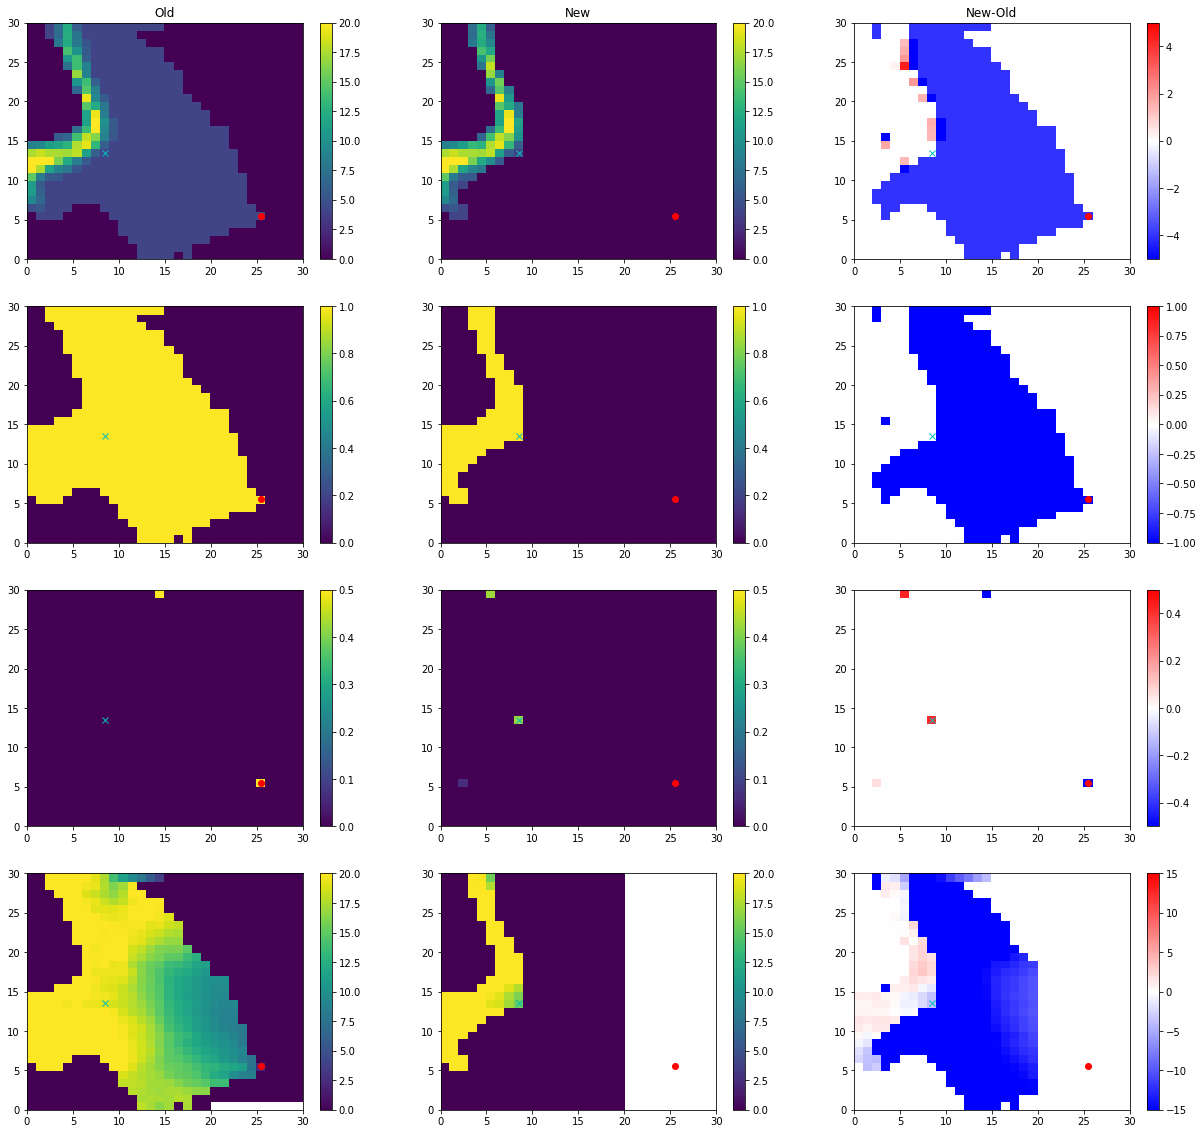

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(21, 20))

# Bathymetry
colours = axs[0, 0].pcolormesh(np.nan_to_num(bathy_old.Bathymetry[ymin:ymax, xmin:xmax]), vmax=20);
fig.colorbar(colours, ax=axs[0, 0])
colours = axs[0, 1].pcolormesh(np.nan_to_num(bathy_new.Bathymetry[ymin:ymax, xmin:xmax]), vmax=20);
fig.colorbar(colours, ax=axs[0, 1])
colours = axs[0, 2].pcolormesh(np.nan_to_num(bathy_new.Bathymetry[ymin:ymax, xmin:xmax]) -
                               np.nan_to_num(bathy_old.Bathymetry[ymin:ymax, xmin:xmax]), 
                               vmin=-5, vmax=5, cmap='bwr');
fig.colorbar(colours, ax=axs[0, 2])

# Meshmask
colours = axs[1, 0].pcolormesh(mesh_old.tmask[0, 0, ymin:ymax, xmin:xmax])
fig.colorbar(colours, ax=axs[1, 0])
colours = axs[1, 1].pcolormesh(mesh_new.tmask[0, 0, ymin:ymax, xmin:xmax])
fig.colorbar(colours, ax=axs[1, 1])
colours = axs[1, 2].pcolormesh(mesh_new.tmask[0, 0, ymin:ymax, xmin:xmax] - 
                               mesh_old.tmask[0, 0, ymin:ymax, xmin:xmax],
                              cmap='bwr', vmax=1, vmin=-1)
fig.colorbar(colours, ax=axs[1, 2])

# Freshwater
colours = axs[2, 0].pcolormesh(freshwater_old.rorunoff[0, ymin:ymax, xmin:xmax], vmax=0.5)
fig.colorbar(colours, ax=axs[2, 0])
colours = axs[2, 1].pcolormesh(freshwater_new.rorunoff[0, ymin:ymax, xmin:xmax], vmax=0.5)
fig.colorbar(colours, ax=axs[2, 1])
colours = axs[2, 2].pcolormesh(freshwater_new.rorunoff[0, ymin:ymax, xmin:xmax] - 
                             freshwater_old.rorunoff[0, ymin:ymax, xmin:xmax],
                               cmap='bwr', vmax=0.5, vmin=-0.5)
fig.colorbar(colours, ax=axs[2, 2])

# Salinity
colours = axs[3, 0].pcolormesh(physics_old.vosaline[0, 0, ymin:ymax, xmin:xmax], vmax=20);
fig.colorbar(colours, ax=axs[3, 0])
colours = axs[3, 1].pcolormesh(physics_new.vosaline[0, 0, ymin:ymax, xmin:xmax], vmax=20);
fig.colorbar(colours, ax=axs[3, 1])
colours = axs[3, 2].pcolormesh((physics_new.vosaline[0, 0, ymin:ymax, xmin:xmax] - 
 physics_old.vosaline[0, 0, ymin:ymax, xmin:xmax]), cmap='bwr', vmax=15, vmin=-15);
fig.colorbar(colours, ax=axs[3, 2])
for row in range(4):
    for column in range(3):
        axs[row, column].plot(Sx_old - xmin + 0.5, Sy_old - ymin + 0.5, 'ro') # +0.5 because of how pcolormesh works
        axs[row, column].plot(Sx_new - xmin + 0.5, Sy_new - ymin + 0.5, 'cx')
axs[0, 0].set_title('Old')
axs[0, 1].set_title('New')
axs[0, 2].set_title('New-Old');

In [70]:
## Cassidy's Files ##

In [14]:
cassidy_old = xr.open_dataset('/ocean/cdonaldson/compare_daily_river/SalishSeaCast_1d_salinity_20190101_20191231.nc')
cassidy_new = xr.open_dataset('/ocean/cdonaldson/compare_daily_river/SalishSeaCast_day_avg_physics_20190101_20191231.nc')

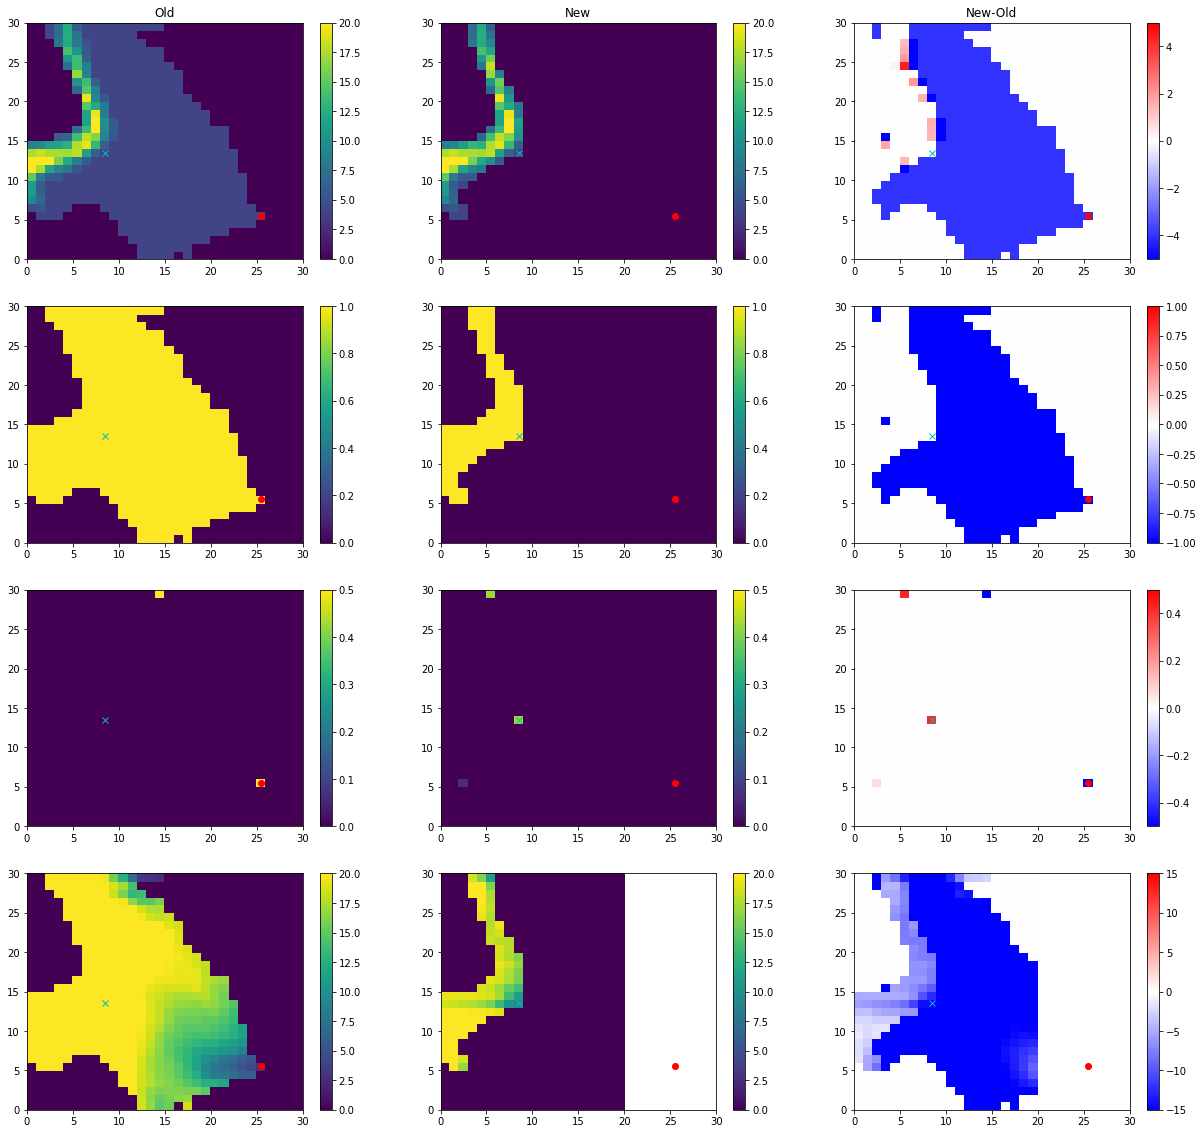

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(21, 20))

it = 365 - 30 + 16

# Bathymetry
colours = axs[0, 0].pcolormesh(np.nan_to_num(bathy_old.Bathymetry[ymin:ymax, xmin:xmax]), vmax=20);
fig.colorbar(colours, ax=axs[0, 0])
colours = axs[0, 1].pcolormesh(np.nan_to_num(bathy_new.Bathymetry[ymin:ymax, xmin:xmax]), vmax=20);
fig.colorbar(colours, ax=axs[0, 1])
colours = axs[0, 2].pcolormesh(np.nan_to_num(bathy_new.Bathymetry[ymin:ymax, xmin:xmax]) -
                               np.nan_to_num(bathy_old.Bathymetry[ymin:ymax, xmin:xmax]), 
                               vmin=-5, vmax=5, cmap='bwr');
fig.colorbar(colours, ax=axs[0, 2])

# Meshmask
colours = axs[1, 0].pcolormesh(mesh_old.tmask[0, 0, ymin:ymax, xmin:xmax])
fig.colorbar(colours, ax=axs[1, 0])
colours = axs[1, 1].pcolormesh(mesh_new.tmask[0, 0, ymin:ymax, xmin:xmax])
fig.colorbar(colours, ax=axs[1, 1])
colours = axs[1, 2].pcolormesh(mesh_new.tmask[0, 0, ymin:ymax, xmin:xmax] - 
                               mesh_old.tmask[0, 0, ymin:ymax, xmin:xmax],
                              cmap='bwr', vmax=1, vmin=-1)
fig.colorbar(colours, ax=axs[1, 2])

# Freshwater
colours = axs[2, 0].pcolormesh(freshwater_old.rorunoff[0, ymin:ymax, xmin:xmax], vmax=0.5)
fig.colorbar(colours, ax=axs[2, 0])
colours = axs[2, 1].pcolormesh(freshwater_new.rorunoff[0, ymin:ymax, xmin:xmax], vmax=0.5)
fig.colorbar(colours, ax=axs[2, 1])
colours = axs[2, 2].pcolormesh(freshwater_new.rorunoff[0, ymin:ymax, xmin:xmax] - 
                             freshwater_old.rorunoff[0, ymin:ymax, xmin:xmax],
                               cmap='bwr', vmax=0.5, vmin=-0.5)
fig.colorbar(colours, ax=axs[2, 2])

# Salinity
colours = axs[3, 0].pcolormesh(cassidy_old.vosaline[it, 0, ymin:ymax, xmin:xmax], vmax=20);
fig.colorbar(colours, ax=axs[3, 0])
colours = axs[3, 1].pcolormesh(cassidy_new.vosaline[it, 0, ymin:ymax, xmin:xmax], vmax=20);
fig.colorbar(colours, ax=axs[3, 1])
colours = axs[3, 2].pcolormesh((cassidy_new.vosaline[it, 0, ymin:ymax, xmin:xmax] - 
 cassidy_old.vosaline[it, 0, ymin:ymax, xmin:xmax]), cmap='bwr', vmax=15, vmin=-15);
fig.colorbar(colours, ax=axs[3, 2])
for row in range(4):
    for column in range(3):
        axs[row, column].plot(Sx_old - xmin + 0.5, Sy_old - ymin + 0.5, 'ro') # +0.5 because of how pcolormesh works
        axs[row, column].plot(Sx_new - xmin + 0.5, Sy_new - ymin + 0.5, 'cx')
axs[0, 0].set_title('Old')
axs[0, 1].set_title('New')
axs[0, 2].set_title('New-Old');